##Harsh Mahajan  (J027)
##Akash Patil    (J036)

In [ ]:
# !conda install dask
# !conda install -c conda-forge python-graphviz/ pip install graphviz

In [ ]:
# !conda install dask                     # either conda install
# !python -m pip install dask[dataframe] --upgrade  # or python -m pip install

In [12]:
!pip install dask[complete]

     |████████████████████████████████| 112kB 8.1MB/s 
     |████████████████████████████████| 686kB 9.3MB/s 
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [1]:
# importing the multiprocessing module 
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


93
96
Square: 100
Cube: 1000
Done!


In [2]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [3]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 11.2 ms, sys: 476 µs, total: 11.7 ms
Wall time: 3 s


In [4]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


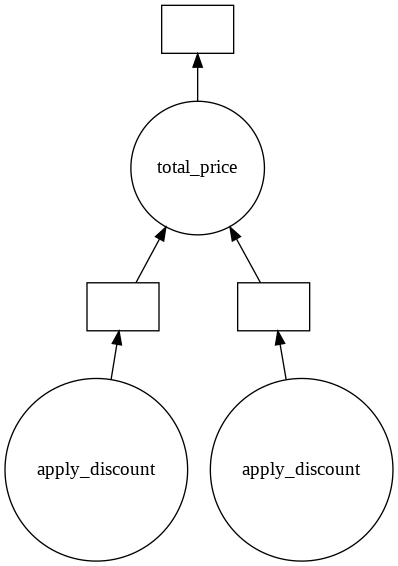

In [5]:
z.visualize()

In [6]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

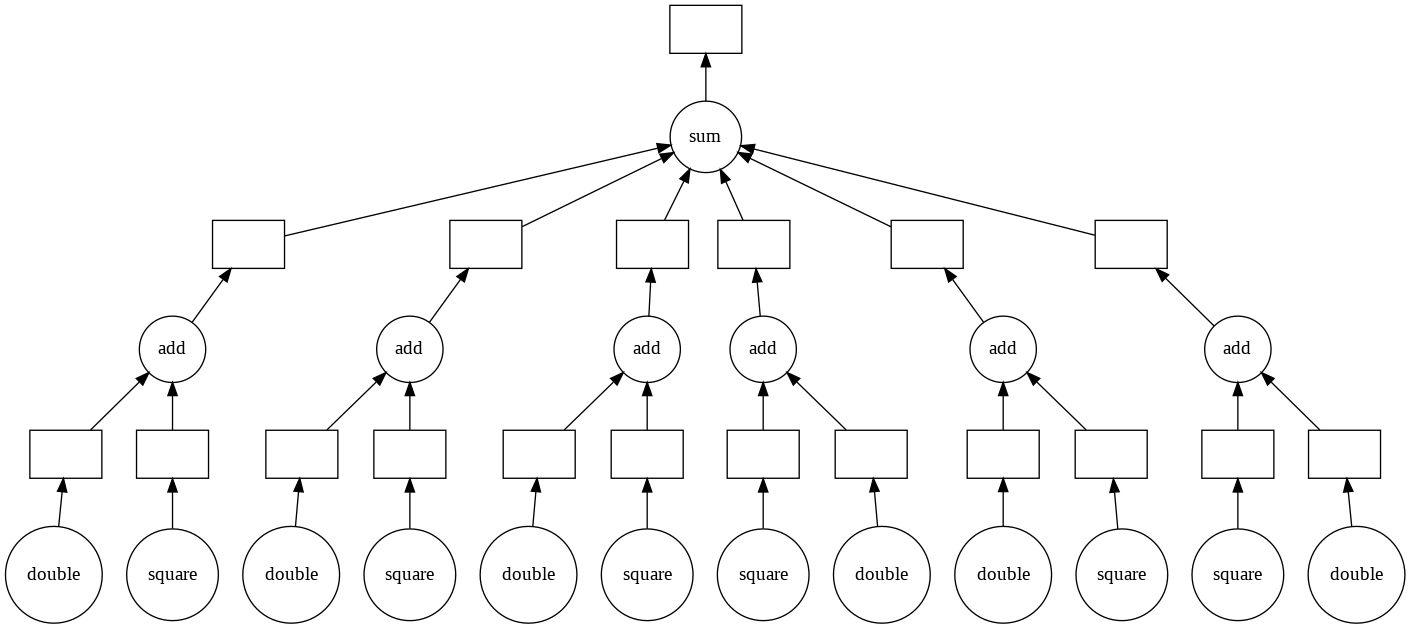

In [7]:
total = delayed(sum)(output)
total.visualize()

In [8]:
import concurrent

In [9]:
import multiprocessing
multiprocessing.cpu_count()

2

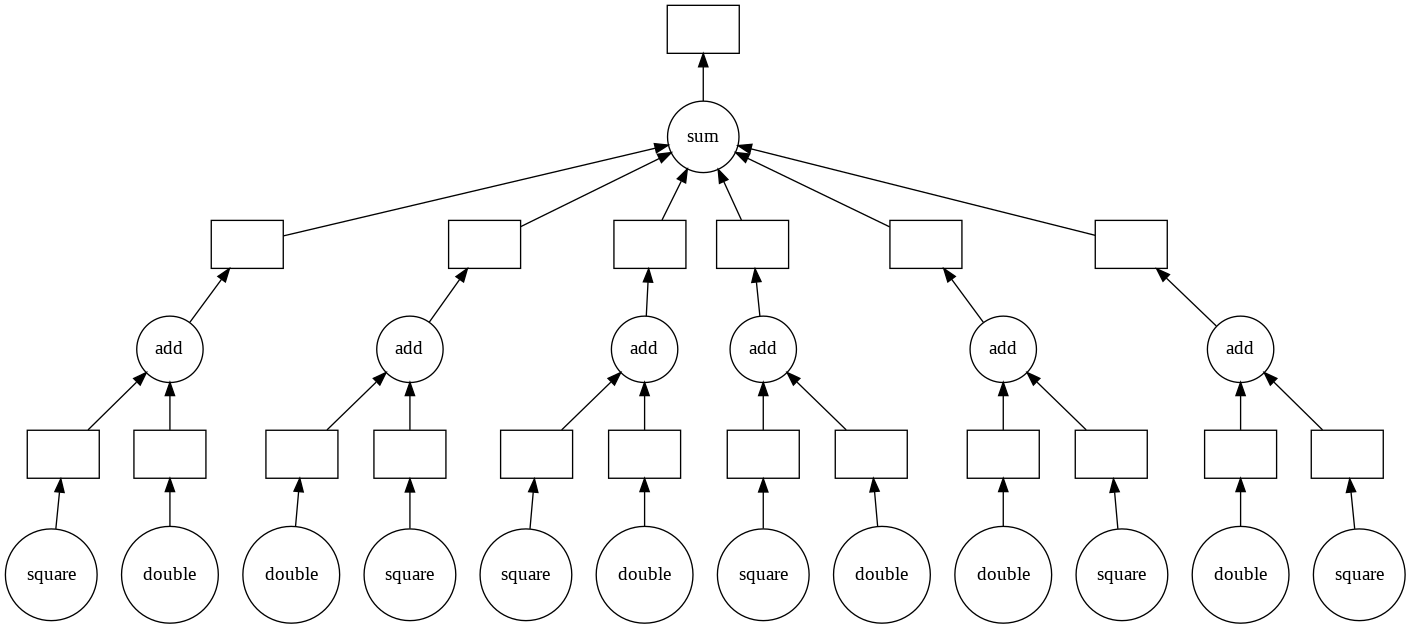

In [10]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [13]:
import dask.dataframe as dd

In [14]:
dask.__version__

'2.12.0'

In [15]:
df = dask.datasets.timeseries()

In [16]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [17]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,993,Dan,0.792398,-0.667104
2000-01-01 00:00:01,1000,Yvonne,0.448277,-0.861940
2000-01-01 00:00:02,997,Michael,0.787673,0.436642
2000-01-01 00:00:03,976,Ursula,-0.935565,0.256617
2000-01-01 00:00:04,977,George,-0.994235,-0.157685


In [18]:
df1 = df.groupby('name').y.std()

In [19]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [20]:
df1.compute()

name
Alice       0.578477
Bob         0.577888
Charlie     0.575532
Dan         0.577968
Edith       0.578479
Frank       0.577278
George      0.577862
Hannah      0.577824
Ingrid      0.576719
Jerry       0.576911
Kevin       0.577107
Laura       0.577535
Michael     0.578446
Norbert     0.577088
Oliver      0.578570
Patricia    0.577478
Quinn       0.578507
Ray         0.577235
Sarah       0.577063
Tim         0.576657
Ursula      0.577891
Victor      0.577918
Wendy       0.577019
Xavier      0.576640
Yvonne      0.577584
Zelda       0.577664
Name: y, dtype: float64

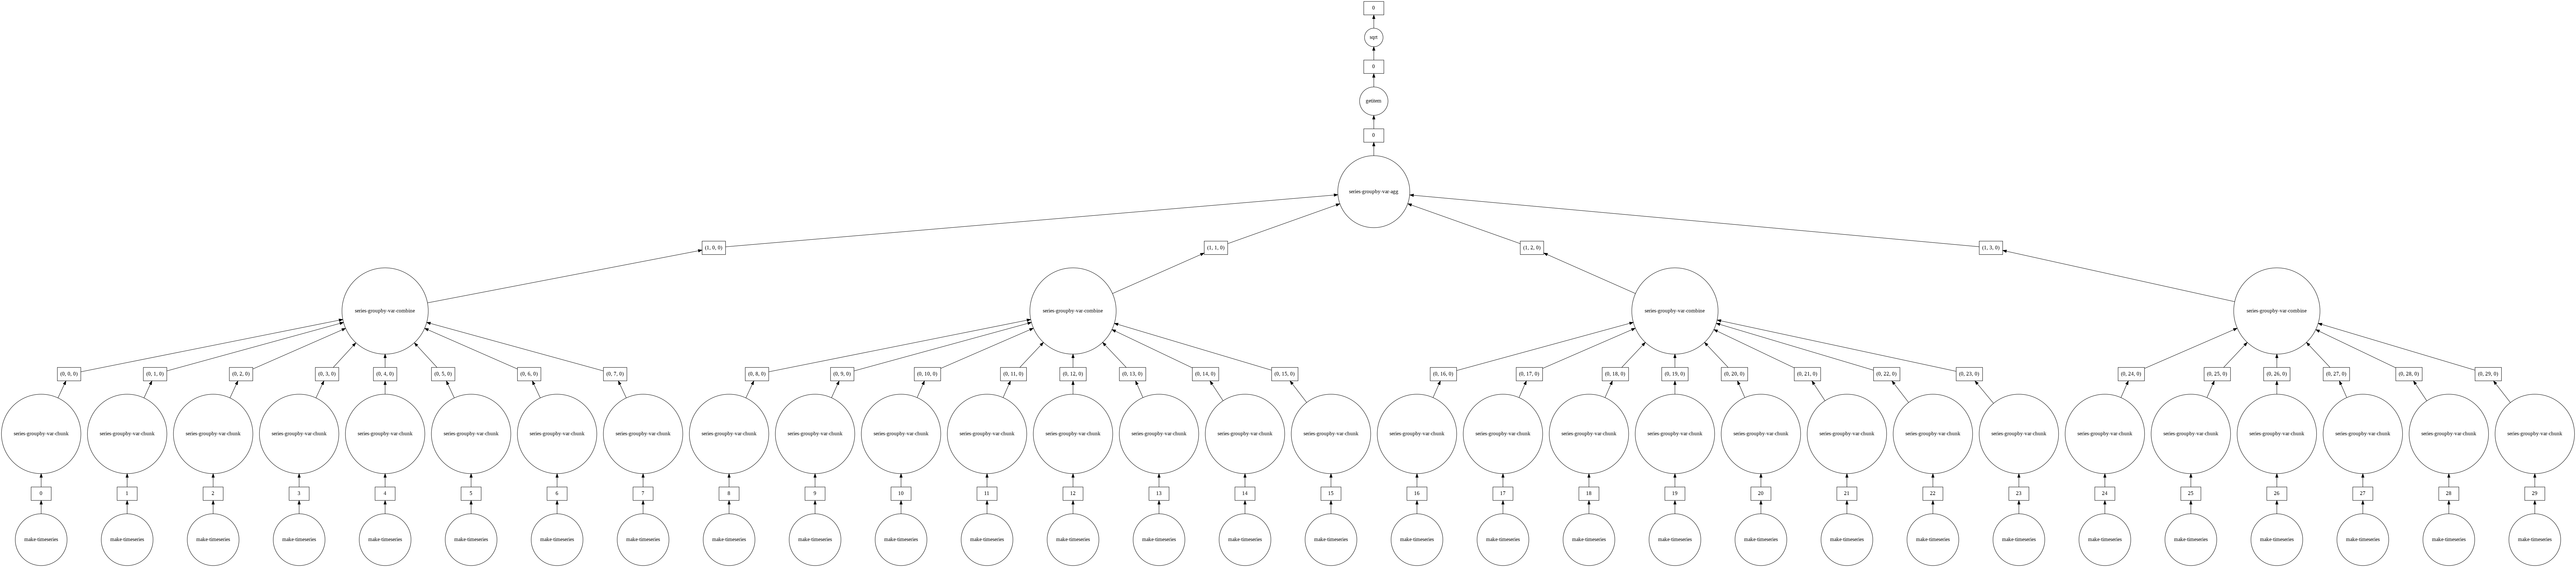

In [21]:
df1.visualize()

In [22]:
%time
df.loc['2000-01-01']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [23]:
df = df.persist()

In [24]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,993,Dan,0.792398,-0.667104
2000-01-01 00:00:01,1000,Yvonne,0.448277,-0.861940
2000-01-01 00:00:02,997,Michael,0.787673,0.436642
2000-01-01 00:00:03,976,Ursula,-0.935565,0.256617
2000-01-01 00:00:04,977,George,-0.994235,-0.157685
...,...,...,...,...
2000-01-01 23:59:55,984,Edith,-0.681651,0.142420
2000-01-01 23:59:56,992,Norbert,0.549634,-0.944090
2000-01-01 23:59:57,985,Dan,-0.619964,-0.673291


In [25]:
import dask.bag as db


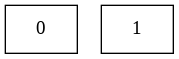

In [26]:
dask_bag = db.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

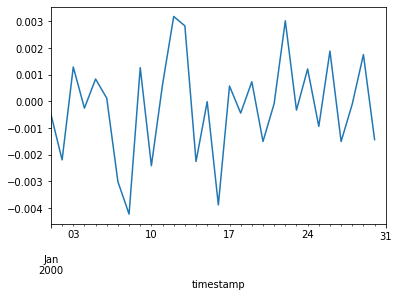

In [27]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [28]:
len(df)

2592000

In [39]:
# from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [ ]:
# client = Client(processes = False)

In [ ]:
# client

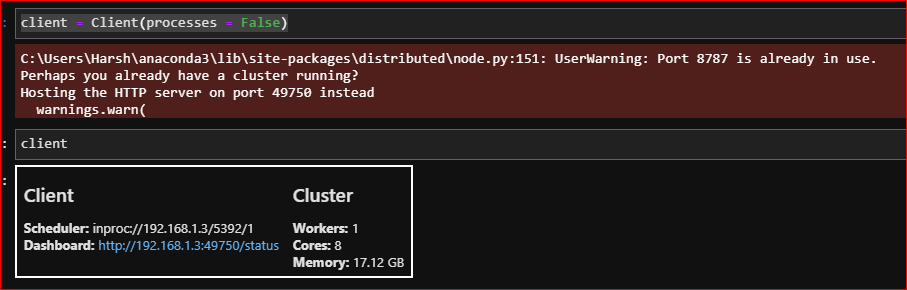

Proof of running it on our systems.
Dask Client does not run on colab

In [47]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.939343,0.959697,0.615688,0.785030
1,0.803668,0.004157,0.523961,0.644530
2,0.758185,0.453844,0.884541,0.123859
3,0.224945,0.684327,0.063234,0.612995
4,0.244175,0.793745,0.485793,0.288440


In [48]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [49]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 7.39 s, sys: 15.6 ms, total: 7.4 s
Wall time: 19.3 s


In [50]:
results

[5001369.2225314155, 5000742.595530426, 4998483.274490998, 4999762.256189668]

In [51]:
import dask

In [52]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 3.25 ms


In [53]:
results[0]

Delayed('costly_simulation-833c85bb-4d9a-4550-b936-0d61df867306')

In [54]:
%time dask.compute(*results)

CPU times: user 7.35 s, sys: 30.5 ms, total: 7.38 s
Wall time: 13.3 s


(5001369.2225314155, 5000742.595530426, 4998483.274490998, 4999762.256189668)